In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img_path = "./data/img_pr_0_gray.jpg"

(241, 1407)


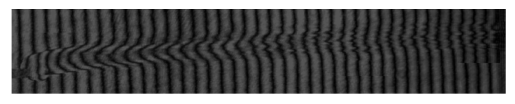

In [3]:
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

print(img.shape)

plt.imshow(img,  cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

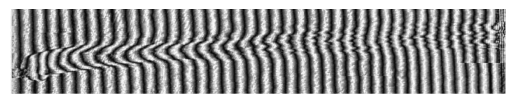

In [4]:
clahe = cv2.createCLAHE(tileGridSize=(40,100))

img_clh = clahe.apply(img)

plt.imshow(img_clh,  cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

(241, 1407)


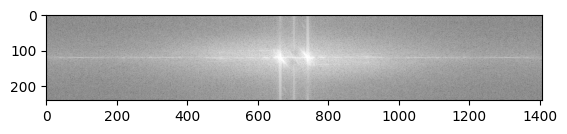

In [5]:
f = np.fft.fft2(img_clh)
fshift = np.fft.fftshift(f)

print(fshift.shape)

magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.imshow(magnitude_spectrum, cmap='gray', vmin=0, vmax=255)
plt.show()

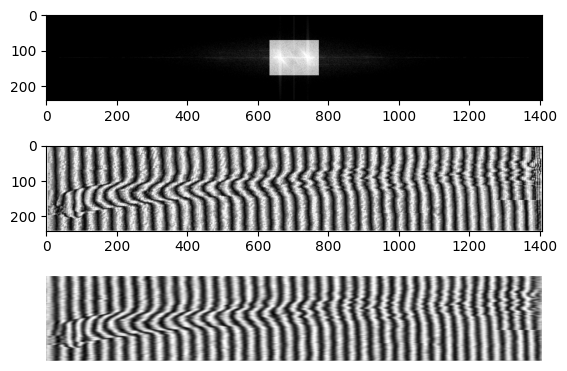

In [38]:
mask = np.ones(f.shape)

c = (f.shape[0]//2+1, f.shape[1]//2+1)
w = 70
h = 50

#mask[c[0]-2:c[0]+2,c[1]-2:c[1]+2] = 0.0001
#mask[c[0],:] = 0.0001
#mask[:,c[1]] = 0.0001


mask[:,0:c[1]-w] = 0.0001
mask[:,c[1]+w:] = 0.0001

mask[0:c[0]-h,:] = 0.0001
mask[c[0]+h:,:] = 0.0001

fshift_flt = fshift*mask
f_flt = np.fft.fftshift(fshift_flt)
img_clh_flt = np.fft.ifft2(f_flt)


plt.subplot(3,1,1)
plt.imshow(20*np.log(np.abs(fshift_flt)), cmap='gray', vmin=0, vmax=255)

plt.subplot(3,1,2)
plt.imshow(img_clh, cmap='gray', vmin=0, vmax=255)

plt.subplot(3,1,3)
plt.imshow(np.abs(img_clh_flt), cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.show()

In [58]:
clahe = cv2.createCLAHE(tileGridSize=(40,100))



img_clh = clahe.apply(np.abs(img_clh_flt).astype(np.uint8))

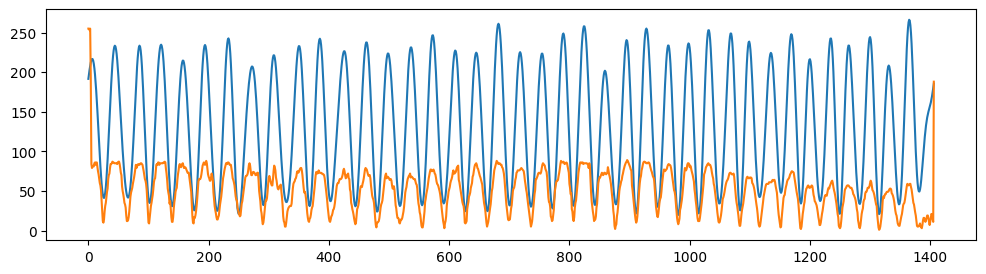

In [39]:
row = 20

img_slice = img[row,:] 
img_flt_slice = img_clh_flt[row,:] 



plt.figure(figsize=(12,3))
plt.plot(np.abs(img_flt_slice))
plt.plot(img_slice)
plt.show()

In [41]:
img_path = "./data/steel/30.jpg"

img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
print(img.shape)

(147, 166)


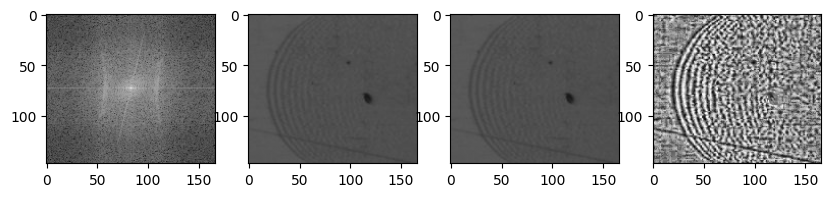

In [66]:
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

mask = np.ones(f.shape)

ch,cw =  f.shape[0]//2+1, f.shape[1]//2+1
hmin,wmin,hmax,wmax = 0,0,50,50

mask[ch-hmin:ch+hmin,cw-wmin:cw+wmin] = 0.0001
#mask[ch-hmin:ch+hmin,cw-wmin:cw+wmin] = 0.0001


fshift_flt = fshift*mask
f_flt = np.fft.fftshift(fshift_flt)

img_flt = np.fft.ifft2(f_flt)

clahe = cv2.createCLAHE(tileGridSize=(40,40))

img_clh = clahe.apply(np.abs(img_flt).astype(np.uint8))


plt.figure(figsize=(10, 5))
plt.subplot(1,4,1)
plt.imshow(20*np.log(np.abs(fshift_flt)), cmap='gray', vmin=0, vmax=255)

plt.subplot(1,4,2)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)

plt.subplot(1,4,3)
plt.imshow(np.abs(img_flt), cmap='gray', vmin=0, vmax=255)

plt.subplot(1,4,4)
plt.imshow(np.abs(img_clh), cmap='gray', vmin=0, vmax=255)

plt.show()

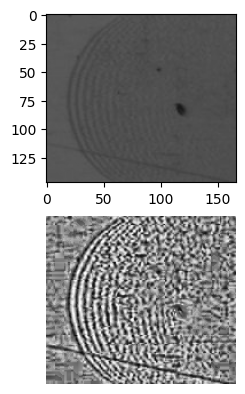

In [45]:
clahe = cv2.createCLAHE(tileGridSize=(30,30))

img_clh = clahe.apply(img)


plt.subplot(2,1,1)
plt.imshow(img,  cmap='gray', vmin=0, vmax=255)
plt.subplot(2,1,2)
plt.imshow(img_clh,  cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

In [57]:
help(cv2.imwrite)


Help on built-in function imwrite:

imwrite(...)
    imwrite(filename, img[, params]) -> retval
    .   @brief Saves an image to a specified file.
    .
    .   The function imwrite saves the image to the specified file. The image format is chosen based on the
    .   filename extension (see cv::imread for the list of extensions). In general, only 8-bit unsigned (CV_8U)
    .   single-channel or 3-channel (with 'BGR' channel order) images
    .   can be saved using this function, with these exceptions:
    .
    .   - With OpenEXR encoder, only 32-bit float (CV_32F) images can be saved.
    .     - 8-bit unsigned (CV_8U) images are not supported.
    .   - With Radiance HDR encoder, non 64-bit float (CV_64F) images can be saved.
    .     - All images will be converted to 32-bit float (CV_32F).
    .   - With JPEG 2000 encoder, 8-bit unsigned (CV_8U) and 16-bit unsigned (CV_16U) images can be saved.
    .   - With JPEG XL encoder, 8-bit unsigned (CV_8U), 16-bit unsigned (CV_16U) and 32